# Aerosol Optics, Aerosol Spectroscopy

## Introduction (Particle size distribution)

From A. Kokhanovsky book "Aerosol Optics":

The optical properties of aerosol particles are largely determined by the ratio  $a/\lambda$,
where $\lambda$ is the wavelength of incident light and $a$ is the characteristic size of a particle
(radius of droplet or a side of a cubic crytal). Therefore, information on typical sizes of sea-salt particles
is of great importance for aerosol optics. This has  been studied in numerous experiments. In particular,
Clarke et al. (2005) found that dry sizes of sea-salt particles are in the range $0.1$ to $10\ \mu\text{m}$.
The number concentration $N$ of sea-salt particles in the open ocean is usually around $250\ \text{cm}^{-3}$.
The value of $N$ of sea-salt particles with typical sizes around $0.3\ \mu\text{m}$. The particle size distribution
of sea-salt aerosol is usually modeled using the lognormal law:

In [1]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import lognorm
# from physipy import units, constants
# from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
sp.init_printing(use_latex=True)

$a$ $-$ radius of spherical homogeneous particle

$\sigma=0.9$

$a_0=0.3\ \mu\text{m}$

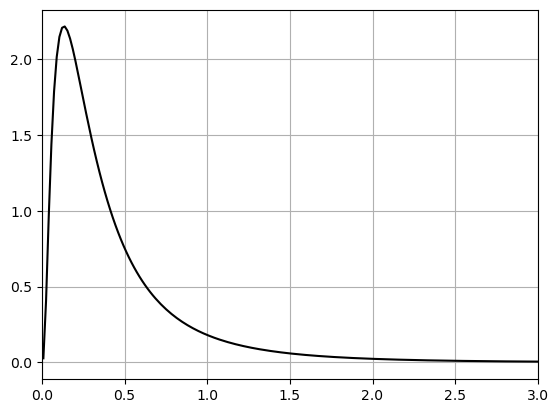

In [2]:
s = 0.9
mu = 0.3
x = np.linspace(lognorm.ppf(0.0000001, s), lognorm.ppf(0.999, s), 1000)
plt.plot(x, lognorm.pdf(x, s, scale=mu), "k-", label="lognorm pdf")
plt.xlim(0, 3)
plt.grid("true")
plt.show()

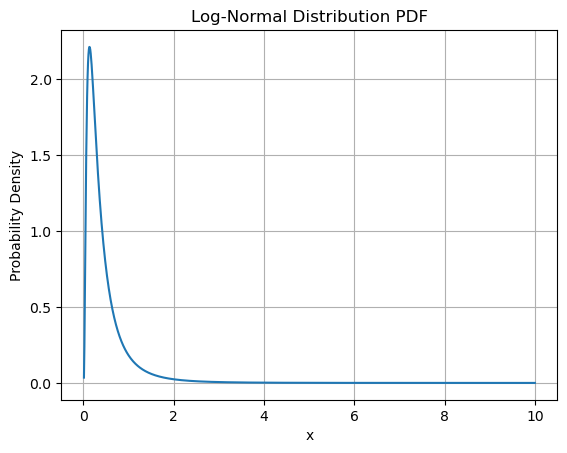

Integral from 0 to infinity: 0.9999999999995361
0.44979075001765884
0.5024603563372585
1.117098020173896


In [3]:
# Parameters for the log-normal distribution
mu = 0.3  # Mean
sigma = 0.9  # Standard deviation

x = np.linspace(0.01, 10, 1000)  # Start from nonzero

pdf = lognorm.pdf(x, sigma, scale=mu)
def avg_size_integrand(x, sigma, mu):
    return x*lognorm.pdf(x, sigma, scale=mu)

def avg_size(sigma, mu):
    return quad(avg_size_integrand, 0, np.inf, args=(sigma, mu))[0]

def stdev_integrand(x, sigma, mu):
    return (x - avg_size(sigma, mu))**2*lognorm.pdf(x, sigma, scale=mu)

def stdev(sigma, mu):
    return np.sqrt(quad(stdev_integrand, 0, np.inf, args=(sigma, mu))[0])

# Calculate the integral from 0 to infinity
integral, error = quad(lognorm.pdf, 0, np.inf, args=(sigma, mu))
test_avg_size = avg_size(sigma, mu)
test_stdev = stdev(sigma, mu)
test_c = test_stdev / test_avg_size


# Plot the PDF
plt.plot(x, pdf)
plt.title('Log-Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

# Print the integral
print(f"Integral from 0 to infinity: {integral}")
print(test_avg_size)
print(test_stdev)
print(test_c)

\frac{\sqrt{2} \int \frac{e^{\frac{\log{\left(\frac{x}{\mu} \right)}^{2}}{2 \sigma^{2}}}}{x}\, dx}{2 \sqrt{\pi} \sigma}


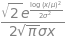

In [4]:
x, mu, sigma = sp.symbols('x mu sigma')
psd_lognormal = ((1/(sp.sqrt(2*sp.pi)*sigma*x))) * sp.exp((sp.ln(x/mu)**2)/(2*sigma**2))
f_psd_lognormal = sp.lambdify([sigma, x, mu], psd_lognormal)
integrated_psd = sp.integrate(psd_lognormal, x)
print(sp.latex(integrated_psd))
# integrated_psd
psd_lognormal

The area under normalized lognormal distribution (integral 0 to +inf) should be 1:
1.0000000000006777

Log normal distribution with (sigma=1, mu=1, x=1)
0.3989422804014327

Average size of particle with (sigma, mu)=(0.9, 0.3):
0.4497907500176589

0.4497907500170301
Both approaches (1.12 and 1.12) should equal  approximately:
True

0.5024603563372585
2.2728332833895966
1.2479079866768072
2.2728332833910545
1.2479079866764717
(1.0000000000006777, 5.838251874305568e-09)


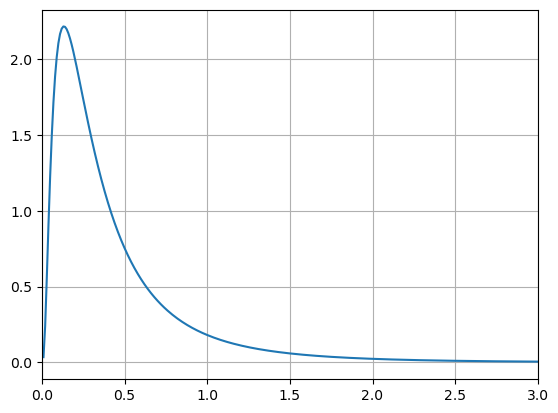

In [ ]:


sigma, mu = 0.9, 0.3 # in micrometers
x_values = np.linspace(0.01, 10, 1000)

def lognormal(x, sigma, mu):
    front_coef = 1 / (np.sqrt(2*np.pi)*sigma*x)
    exp_power = -np.log(x/mu)**2/(2*sigma**2)
    return front_coef*np.exp(exp_power)

def avg_size_integrand(x: float, sigma: float, mu: float) -> float:  # noqa: F811
    front_coef = 1 / (np.sqrt(2*np.pi)*sigma*x)
    exp_power = -np.log(x/mu)**2/(2*sigma**2)
    return x*front_coef*np.exp(exp_power)

def avg_size_integrand_alt(x, sigma, mu):
    return x*lognorm.pdf(x, sigma, scale=mu)

def avg_size(sigma, mu):
    return quad(avg_size_integrand, 0, np.inf, args=(sigma, mu))[0]

def avg_size_alt(sigma, mu):
    return quad(avg_size_integrand_alt, 0, np.inf, args=(sigma, mu))[0]

def stdev_integrand(x, sigma, mu):  # noqa: F811
    return (x - avg_size(sigma, mu))**2*lognormal(x, sigma, mu)

def stdev_delta(sigma, mu):
    return np.sqrt(quad(stdev_integrand, 0, np.inf, args=(sigma, mu))[0])





def effective_radius_numerator_integrand(x, sigma, mu):
    return x**3*lognormal(x, sigma, mu)

def effective_radius_denominator_integrand(x, sigma, mu):
    return x**2*lognormal(x, sigma, mu)

def effective_radius_numerator(sigma, mu):
    return quad(effective_radius_numerator_integrand, 0, np.inf, args=(sigma, mu))[0]

def effective_radius_denominator(sigma, mu):
    return quad(effective_radius_denominator_integrand, 0, np.inf, args=(sigma, mu))[0]

def effective_radius(sigma, mu):
    return effective_radius_numerator(sigma, mu) / effective_radius_denominator(sigma, mu)

def effective_variance_numerator_integrand(x, sigma, mu):
    return (x-effective_radius(sigma, mu))**2*x**2*lognormal(x, sigma, mu)

def effective_variance_numerator(sigma, mu):
    return quad(effective_variance_numerator_integrand, 0, np.inf, args=(sigma, mu))[0]

def effective_variance_denominator_integrand(x, sigma, mu):
    return x**2*lognormal(x, sigma, mu)

def effective_variance_denominator(sigma, mu):
    return effective_radius(sigma, mu)**2*quad(effective_variance_denominator_integrand, 0, np.inf, args=(sigma, mu))[0]

def effective_variance(sigma, mu):
    return effective_variance_numerator(sigma, mu) / effective_variance_denominator(sigma, mu)

# FAST FUNCTIONS

def big_c(sigma):
    return np.sqrt(np.exp(sigma**2) - 1)

def a_bar(sigma, mu):
    return mu*np.exp(0.5*sigma**2)

def effective_radius_alt(sigma, mu):
    return mu*np.exp(2.5*sigma**2)

def effective_variance_alt(sigma):
    return np.exp(sigma**2) - 1

def modal_radius(sigma: float, mu: float) -> float:
    return mu*np.exp(-sigma**2)

def n_particles(sigma, mu):
    return quad(lognormal, 0, np.inf, args=(sigma, mu))



test_lognormal = lognormal(1, 1, 1)
test_quad = quad(lognormal, 0, np.inf, args=(sigma, mu))
test_avg_size = quad(avg_size_integrand, 0, np.inf, args=(sigma, mu))[0]
test_avg_size_alt = quad(avg_size_integrand_alt, 0, np.inf, args=(sigma, mu))[0]
test_stdev = stdev_delta(sigma, mu)
coef_of_variance = test_stdev / test_avg_size
test_big_c = big_c(sigma)
test_a_bar = a_bar(sigma, mu)
test_coef_again = test_stdev / test_a_bar
test_effective_radius = effective_radius(sigma, mu)
test_effective_variance = effective_variance(sigma, mu)
test_effective_radius_alt = effective_radius_alt(sigma, mu)
test_effective_variance_alt = effective_variance_alt(sigma)
test_n_particles = n_particles(sigma, mu)

print( f"The area under normalized lognormal distribution (integral 0 to +inf) should be 1:\n{test_quad[0]}\n" )
print(f"Log normal distribution with (sigma=1, mu=1, x=1)\n{ test_lognormal }\n")
print(f"Average size of particle with (sigma, mu)=({sigma}, {mu}):\n{ test_avg_size }\n")
# print(test_avg_size_alt) # <-------- much slower. Use custom numpy functions!
print(f"{ test_a_bar }")
print(f"Both approaches ({coef_of_variance:.2f} and {test_big_c:.2f}) should equal  approximately:\n{ round(test_big_c, 2) == round(coef_of_variance, 2) }\n")
print(test_stdev)
print(test_effective_radius)
print(test_effective_variance)
print(test_effective_radius_alt)
print(test_effective_variance_alt)
print(test_n_particles)

plt.plot(x_values, lognormal(x_values, sigma=sigma, mu=mu))
plt.xlim(0, 3)
plt.grid(True)
plt.show()

### Timing tests

In [12]:
%timeit test_stdev_2 = stdev_delta(sigma, mu)

110 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%timeit test_stdev_1 = test_big_c * test_a_bar

27.2 ns ± 0.616 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [11]:
%timeit test_big_c = big_c(sigma)

894 ns ± 29.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
# the fastest!!!
%timeit test_a_bar = a_bar(sigma, mu)

489 ns ± 9.41 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [6]:
# manually written function using python math syntax
%timeit test_avg_size = quad(avg_size_integrand, 0, np.inf, args=(sigma, mu))[0]

379 μs ± 3.52 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
# using scipy
%timeit test_avg_size_alt = quad(avg_size_integrand_alt, 0, np.inf, args=(sigma, mu))[0]

11.7 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Various forms and quantities from particle size distribution

$f(a)\equiv \dfrac{d N}{d a} = \dfrac{1}{a} \dfrac{d N}{d\ln a} = \dfrac{1}{a\ln 10}\dfrac{dN}{d\log{a}} = \dfrac{1}{\pi a^2}\dfrac{dS}{da} = \dfrac{3}{4\pi a^3}\dfrac{dV}{da} = \dfrac{3}{4\pi a^4}\dfrac{dV}{d\ln a} = \dfrac{3}{4\pi\rho a^3}\dfrac{dM}{da}$

$C_{sca}$ --> Scattering XS (cross-section)

$C_{abs}$ --> Absorption XS

$I_0$ --> intensity of incident light

$I_{sca}$ --> intensity of scattered light

$S$ --> Surface surrounding the particle

$V$ --> Volume of the particle

$G$ --> Geometrical XS (projection of particle onto the plane perpendicular to the beam propagation direction)

$k$ --> $k=2\pi/\lambda$

$\vec{E_0}$ --> Electric vector of the incident wave

$\vec{E}$ --> Electric vector inside the scatterer

$C_{sca}=\displaystyle\frac{1}{I_0}\displaystyle\int_SI_{sca}dS$

$C_{abs}=\displaystyle\frac{k}{\left|\vec{E_0}\right|^2}\displaystyle\int_{V}\left|\vec{E}\right|^2\epsilon''dV$